# Homework #2: Finding Secondary Signals using Likelihood Profiles

Janelle Sy

October 11, 2022

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import pickle as pkl
from scipy import optimize

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


***Problem 1: Take the pickle file from the discord server (and the instructions delivered therewith) and measure, in each of the 11 data provided sets, the amplitude of the 100-day-period sinusoidal signal, plus an uncertainty.***

In [2]:
with open("data.pkl", "rb") as handle:
    data = pkl.load(handle).T

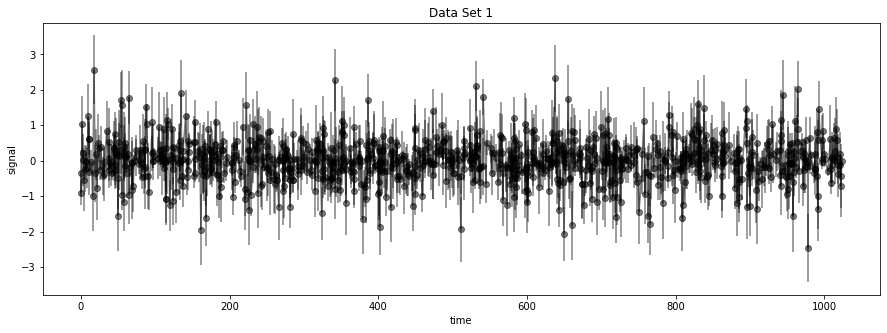

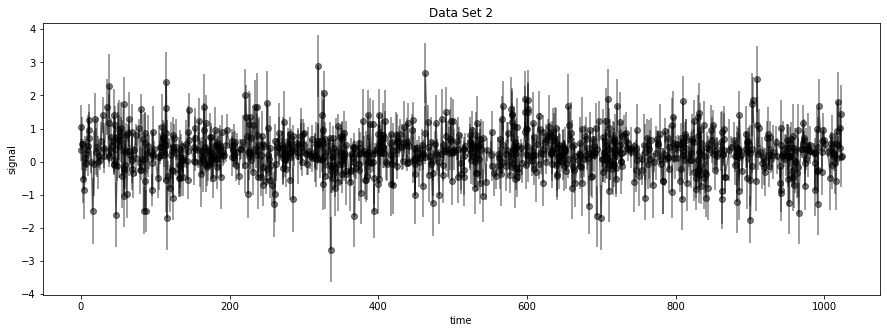

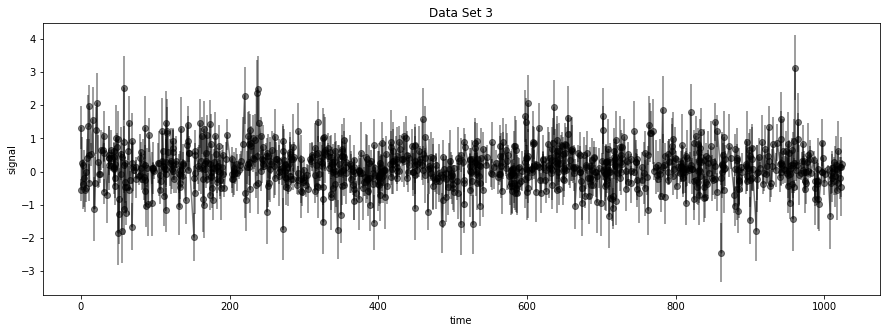

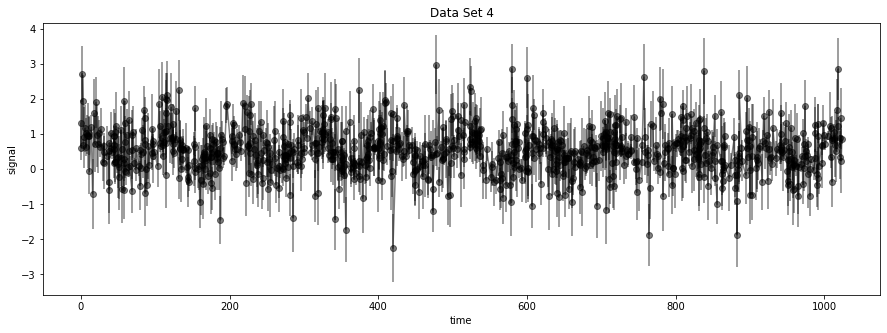

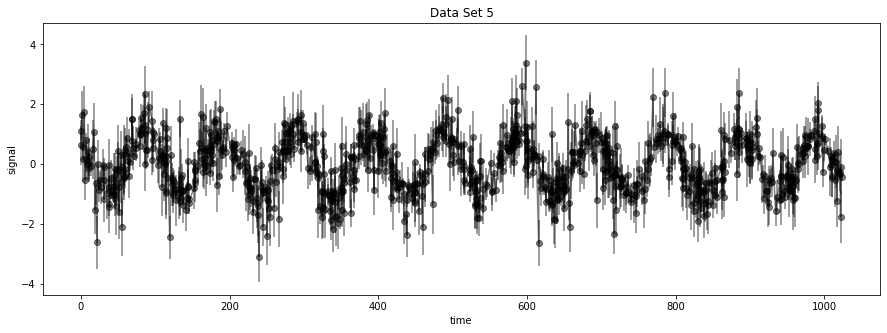

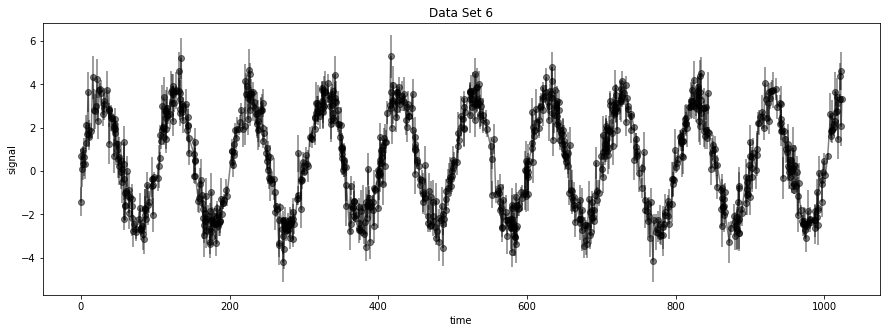

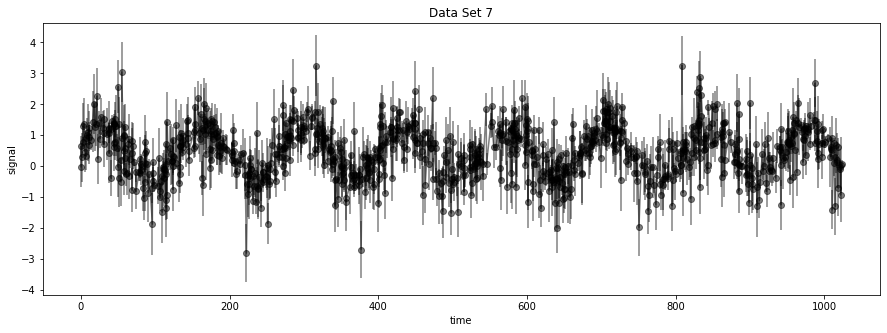

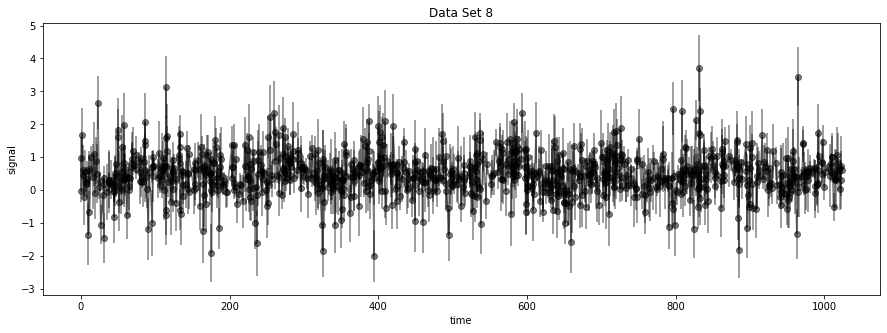

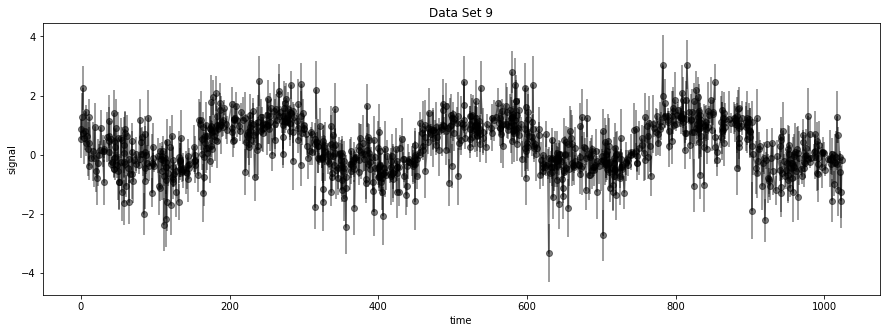

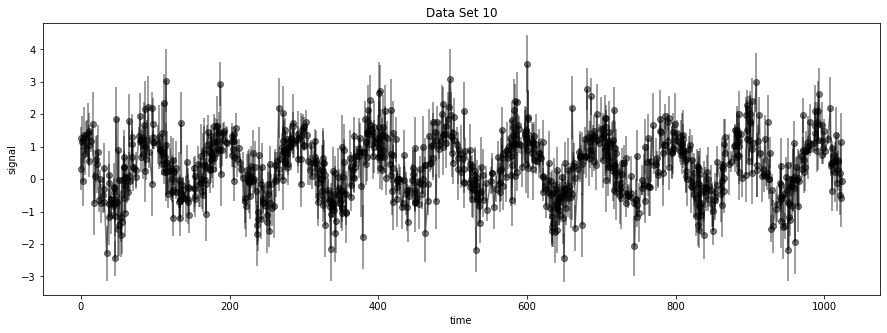

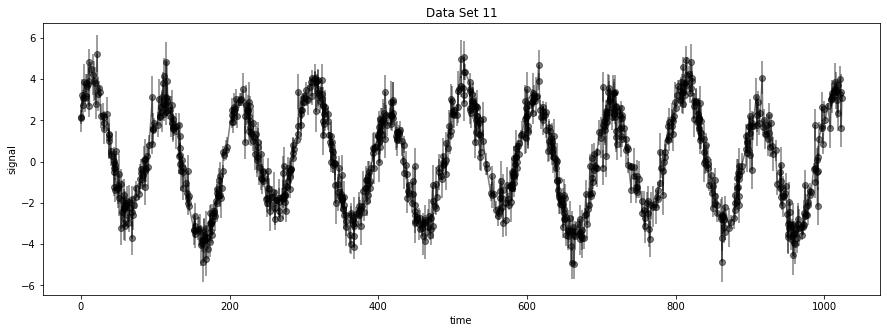

In [3]:
# data[0] is the array of times (day units)
# data[1] is the array of uncertainties (m/s units)
# data[2:13] are data sets (m/s units)
time = data [0]
sigma_y = data[1]

for i in range(2, 13):
    plt.figure(figsize=(15, 5))
    plt.errorbar(data[0], data[i], yerr=data[1],
                 color="k", marker="o", alpha=0.5)
    plt.xlabel("time")
    plt.ylabel("signal")
    plt.title("Data Set {}".format(i-1))

In [4]:
# data[0] is the array of times (day units)
# data[1] is the array of uncertainties (m/s units)
# data[2:13] are data sets (m/s units)

def MLE(time, y, sigma_y, T_0):
    Y = np.reshape(y,(len(y),1))
    A = np.column_stack([np.ones(len(time)),np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0)])
    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)

    X = np.linalg.inv(np.transpose(A)@C_inv@A)@np.transpose(A)@C_inv@Y
    variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))
    tot_amp = np.sqrt(X[0][0]**2 + X[1][0]**2)

    print('The maximum likelihood estimates for B, A_1, and A_2 respectively are:', X[0][0], ',', X[1][0], ',', '&', X[2][0])

    return X, tot_amp

## Measuring amplitudes & DC level of each dataset:

In [5]:
period = 100 #days 
MLE_data = []
for i in range(2, 13):
    MLE_data.append(MLE(data[0], data[i], data[1], period))

<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.005081542418668272 , 0.00895934172905962 , & -0.0009323475282495127
The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.2864031388546412 , 0.02680687866570526 , & 0.04253461737063292
The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.09560587615386176 , -0.086622076695406 , & 0.08813395040497904
The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.5235855273444878 , 0.18853249566290423 , & 0.24983258487205323
The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.007465138436013909 , 0.762260606265875 , & -0.6185043644730612
The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.4600945281516129 , -0.46008997636830934 , & 2.9716239966456435
The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.4927122476466542 , -0.038187812704585135 , & -0.03799635670862049
The maximum likelihood estimates for B, 

## Overlay best-fit parameters on top of signal as a sanity check:

In [6]:
#defining a function to fit the best fit sin signal
def sin_signal(B, A_1, A_2, time, T_0):
    return B + A_1*np.cos(2 * np.pi * time/T_0) + A_2*np.sin(2 * np.pi * time/T_0)


The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.005081542418668272 , 0.00895934172905962 , & -0.0009323475282495127


<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


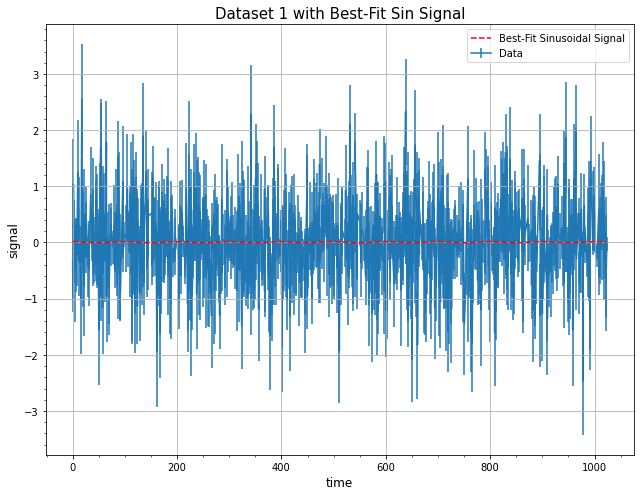

In [7]:
# Some more sanity check with Dataset 1
results_1 = MLE(data[0], data[2], data[1], period)

# Let's visualize the data!
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal(results_1[0][0], results_1[0][1], results_1[0][2], time, 100)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal', zorder = 2)
plt.errorbar(time, data[2], yerr = sigma_y, markersize = 10, label = 'Data', zorder = 1)

plt.title('Dataset 1 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.2864031388546412 , 0.02680687866570526 , & 0.04253461737063292


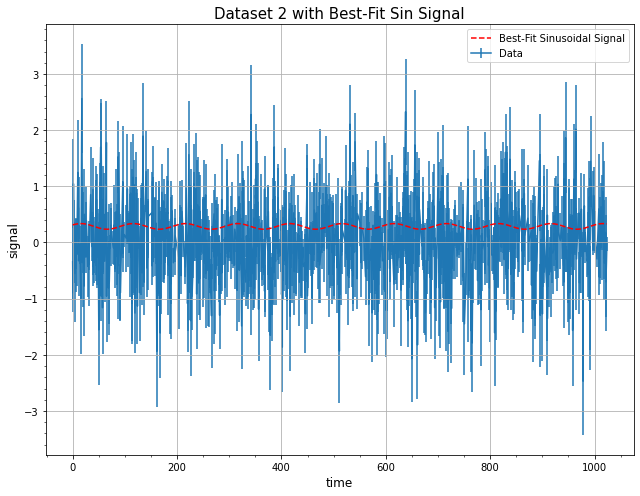

In [8]:
# DATASET 2
results_2 = MLE(data[0], data[3], data[1], period)

# Let's visualize the data!
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal(results_2[0][0], results_2[0][1], results_2[0][2], time, 100)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal', zorder = 2)
plt.errorbar(time, data[2], yerr = sigma_y, markersize = 10, label = 'Data', zorder = 1)

plt.title('Dataset 2 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.4927122476466542 , -0.038187812704585135 , & -0.03799635670862049


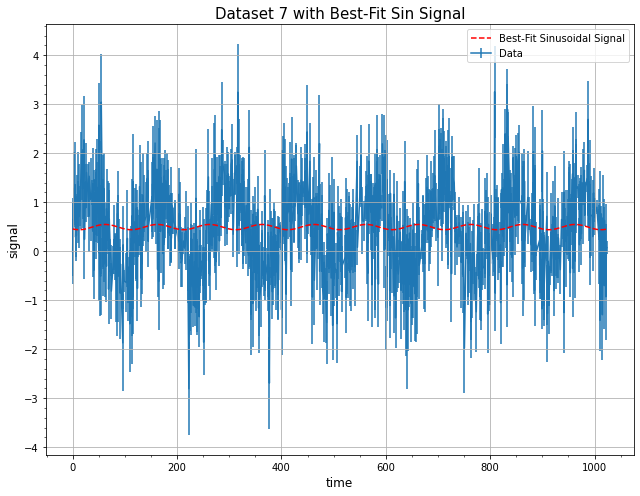

In [9]:
# DATASET 7
results_7 = MLE(data[0], data[8], data[1], period)

# Let's visualize the data!
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal(results_7[0][0], results_7[0][1], results_7[0][2], time, 100)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal', zorder = 2)
plt.errorbar(time, data[8], yerr = sigma_y, markersize = 10, label = 'Data', zorder = 1)

plt.title('Dataset 7 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.4908278828992465 , 0.07607087336162162 , & -0.08244428000803192


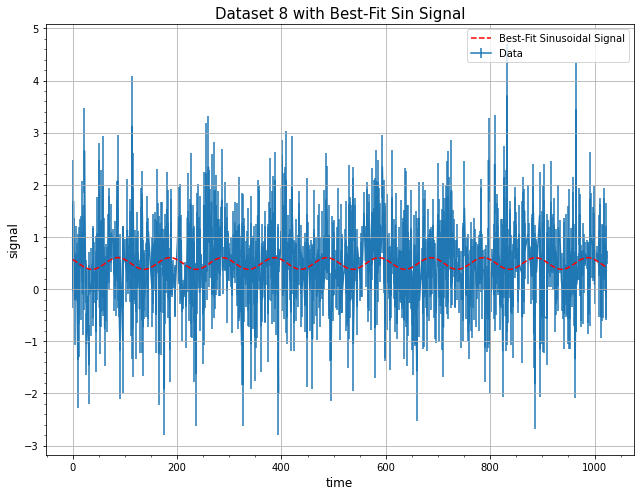

In [10]:
# DATASET 8
results_8 = MLE(data[0], data[9], data[1], period)

# Let's visualize the data!
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal(results_8[0][0], results_8[0][1], results_8[0][2], time, 100)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal', zorder = 2)
plt.errorbar(time, data[9], yerr = sigma_y, markersize = 10, label = 'Data', zorder = 1)

plt.title('Dataset 8 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.2721789159224248 , 0.24901591116143112 , & -0.24356205806470504


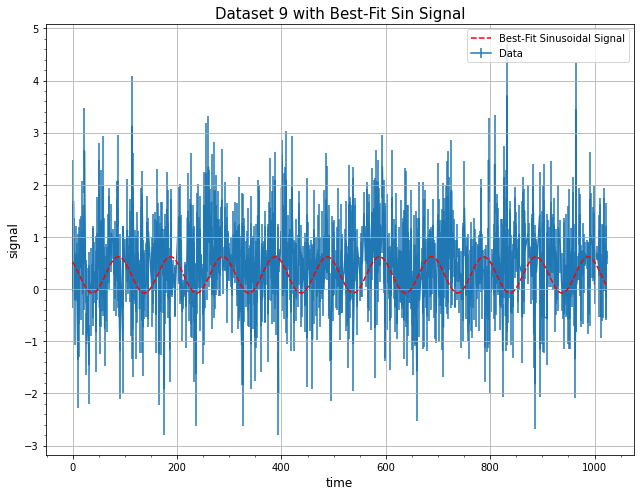

In [11]:
# DATASET 9
results_9 = MLE(data[0], data[10], data[1], period)

# Let's visualize the data!
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal(results_9[0][0], results_9[0][1], results_9[0][2], time, 100)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal', zorder = 2)
plt.errorbar(time, data[9], yerr = sigma_y, markersize = 10, label = 'Data', zorder = 1)

plt.title('Dataset 9 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.03377263359620273 , 2.060954430772714 , & 2.3140514104055048


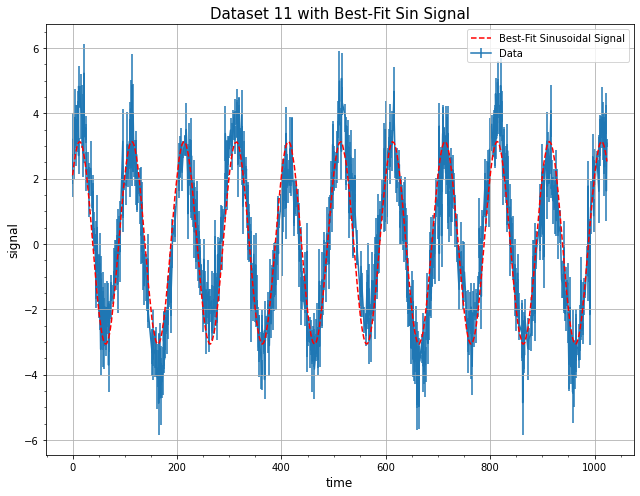

In [12]:
# DATASET 11
results_11 = MLE(data[0], data[12], data[1], period)

# Let's visualize the data!
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal(results_11[0][0], results_11[0][1], results_11[0][2], time, 100)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal', zorder = 2)
plt.errorbar(time, data[12], yerr = sigma_y, markersize = 10, label = 'Data', zorder = 1)

plt.title('Dataset 11 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

## Error Analysis with Bootstrapping Method

In [13]:
# err analysis --> bootstrap with 12 trials
tot_amp = []

for i in range(0,11):
    tot_amp.append(MLE_data[i][1])

M = 12 # number of trials

In [14]:
def amp(time, y, sigma_y, T_0):
    Y = np.reshape(y,(len(y),1))
    A = np.column_stack([np.ones(len(time)),np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0)])
    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)

    X = np.linalg.inv(np.transpose(A)@C_inv@A)@np.transpose(A)@C_inv@Y
    variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))
    tot_amp = np.sqrt(X[0][0]**2 + X[1][0]**2)

    return tot_amp

In [15]:
def bootstrap(time, y, sigma_y, M, A):
    bootstrapped_A = []
    
    for j in range(M): #resampling of x (with replacement)
        index = np.random.randint(0,len(time), len(time))
        sample = time[index]
        
        calculated_A = amp(sample, y, sigma_y, 100)
        
        bootstrapped_A.append(calculated_A)
        
        uncertainty_var_A = 1/M * (np.sum(calculated_A - A))**2

    return uncertainty_var_A

In [16]:
bootstrap_data = []

for i in range(0,11):
    bootstrap_data.append(bootstrap(time, data[i], sigma_y, M, tot_amp[i]))
   
# if this is correct, these are the errors associated with each total amplitude
# the first value seems very off though
print(bootstrap_data)

<ipython-input-14-0d3f9fa23751>:9: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


[23161.542022063662, 5.81985179794591e-05, 0.0011770054093084988, 0.006066947706387368, 0.037795085672407185, 0.0011944482607891447, 0.013708716469992603, 0.0003450925175438483, 0.0011351788746933483, 0.01642094582472185, 0.260475931522059]


***Problem 2: Which of the data sets contain another statistically significant sinusoidal signal at another period? What is the amplitude and period of that signal in each significant case? When you make those measurements, do so in a way that provides uncertainties, marginalizing out the 100-day-period signals.***


# Calculating Log Likelihood

In [17]:
def log_likelihood(pars, time, y, sigma_y):
    T_0 = 100 #days 

    Y = np.reshape(y,(len(y),1))
    X = np.column_stack([np.ones(len(time)),
                         np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0)])
    
    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)

    #Equation 7 in data analysis recipes: fiting a model to data
    L = -1/2 * (X@pars - Y).T@C_inv@(X@pars - Y)
    
    #print('The Log Likelihood is', L[0][0])
    
    return (-1) * L[0][0]

## Let's do a sanity check and first calculate and optimize the log likelihood for Data Set 1

In [18]:
# Data Set 1

y = data[2]

MLE_results = MLE(time, y, sigma_y, 100)

A_1 = MLE_results[0][0]
A_2 = MLE_results[0][1]
B = MLE_results[0][2]

pars = A_1, A_2, B

time = data[0]
sigma_y = data[1]
y = data[2]

log_likelihood_results = log_likelihood(pars, time, y, sigma_y)

The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.005081542418668272 , 0.00895934172905962 , & -0.0009323475282495127


<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


In [19]:
# need to optimize the log likelihood! 
# if we optimize the log likelihood this way, we need to ensure log likelihood is a positive value
optimize.minimize(log_likelihood, pars, args = (time, y, sigma_y), method = 'Nelder-Mead')

 final_simplex: (array([[ 0.00474089,  0.00094131, -0.00157029],
       [ 0.00482747,  0.00089593, -0.00158499],
       [ 0.00474816,  0.00098101, -0.00156512],
       [ 0.0047755 ,  0.00089177, -0.00156979]]), array([503.91958372, 503.91958484, 503.9195864 , 503.91958759]))
           fun: 503.9195837175761
       message: 'Optimization terminated successfully.'
          nfev: 44
           nit: 22
        status: 0
       success: True
             x: array([ 0.00474089,  0.00094131, -0.00157029])

## The above seems sensical so let's continue with the other datasets!

In [20]:
# log likelihoods for all data sets --> next step is to optimize this
for i in range(2, 13):
    log_likelihood(pars, time, data[i], data[1])

In [21]:
# log likelihoods for all data sets --> next step is to optimize this
for i in range(2, 13):
    
    time = data[0]
    y = data[i]
    sigma_y = data[1]

    MLE_results = MLE(time, y, sigma_y, 100)

    A_1 = MLE_results[0][0]
    A_2 = MLE_results[0][1]
    B = MLE_results[0][2]

    pars = A_1, A_2, B

    time = data[0]
    sigma_y = data[1]
    y = data[2]
    log_likelihood(pars, time, data[i], data[1])
    
    print(optimize.minimize(log_likelihood, pars, args =(time, y, sigma_y), method = 'Nelder-Mead'))

<ipython-input-4-31043771589d>:13: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(np.transpose(A)@C_inv@A))


The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.005081542418668272 , 0.00895934172905962 , & -0.0009323475282495127
 final_simplex: (array([[ 0.00474089,  0.00094131, -0.00157029],
       [ 0.00482747,  0.00089593, -0.00158499],
       [ 0.00474816,  0.00098101, -0.00156512],
       [ 0.0047755 ,  0.00089177, -0.00156979]]), array([503.91958372, 503.91958484, 503.9195864 , 503.91958759]))
           fun: 503.9195837175761
       message: 'Optimization terminated successfully.'
          nfev: 44
           nit: 22
        status: 0
       success: True
             x: array([ 0.00474089,  0.00094131, -0.00157029])
The maximum likelihood estimates for B, A_1, and A_2 respectively are: 0.2864031388546412 , 0.02680687866570526 , & 0.04253461737063292
 final_simplex: (array([[-0.02742071,  0.03288015,  0.05576302],
       [-0.02744293,  0.03288052,  0.05576849],
       [-0.02735656,  0.03288054,  0.05576367],
       [-0.02733967,  0.03287722,  0.05576279]]), array(

## Now we want to find a secondary signal (if it exists in the dataset). We will do this by optimizing our nuisance parameter (the period in this case). Also known as profiling out our nuisance parameter.

## Again, let's just do Dataset 1 as a sanity check:

In [22]:
# optimize nuisance parameter (period in this case)
# solving thru brute force

def pro_likelihood(T, time, y, sigma_y):
    T_0 = 100 #days 
    Y = np.reshape(y,(len(y),1))
    A = np.column_stack([np.ones(len(time)), 
                         np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0), 
                         np.cos(2 * np.pi * time/T), 
                         np.sin(2 * np.pi * time/T)])

    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)

    # this should give us the best A_1, A_2, A_3, A_4, and B values at the given T
    pars = np.linalg.lstsq(A.T@C_inv@A, A.T@C_inv@Y, rcond = None)[0]

    # now plug in pars to our likelihood function
    # next step is to optimize this and plot against period to find the secondary period

    # equation 7 in data analysis recipes: fiting a model to data
    L = -1/2 * (A@pars - Y).T@C_inv@(A@pars - Y)
    
    return L[0][0]

In [23]:
results_ds1 = []

T = []
T_start = 1 # days
T_end = 1024

for i in np.arange(T_start, T_end, 1):
    #pro_likelihood takes in arguments (T, time, y, sigma_y)
    results_ds1.append(pro_likelihood(i, data[0], data[2], data[1]))
    

## Now let's see Dataset 1's Profiled Log Likelihood vs. Period plot!

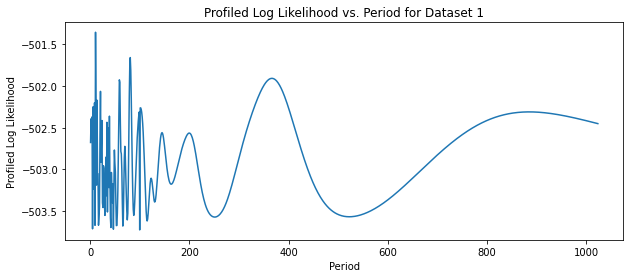

In [24]:
plt.figure(figsize = (10,4))
timestep = np.arange(T_start, T_end, 1)  
plt.plot(timestep, results_ds1)
plt.title('Profiled Log Likelihood vs. Period for Dataset 1')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')

plt.show()

## Let's see the Profiled Log Likelihood vs Period plots for all datasets:

In [25]:
results_ds2 = []
results_ds3 = []
results_ds4 = []
results_ds5 = []
results_ds6 = []
results_ds7 = []
results_ds8 = []
results_ds9 = []
results_ds10 = []
results_ds11 = []

T = []
T_start = 1 # days
T_end = 1024

for i in timestep:
    results_ds2.append(pro_likelihood(i, data[0], data[3], data[1]))
    
for i in timestep:
    results_ds3.append(pro_likelihood(i, data[0], data[4], data[1]))

for i in timestep:
    results_ds4.append(pro_likelihood(i, data[0], data[5], data[1]))

for i in timestep:
    results_ds5.append(pro_likelihood(i, data[0], data[6], data[1]))
    
for i in timestep:
    results_ds6.append(pro_likelihood(i, data[0], data[7], data[1]))

for i in timestep:
    results_ds7.append(pro_likelihood(i, data[0], data[8], data[1]))

for i in timestep:
    results_ds8.append(pro_likelihood(i, data[0], data[9], data[1]))

for i in timestep:
    results_ds9.append(pro_likelihood(i, data[0], data[10], data[1]))

for i in timestep:
    results_ds10.append(pro_likelihood(i, data[0], data[11], data[1]))
    
for i in timestep:
    results_ds11.append(pro_likelihood(i, data[0], data[12], data[1]))

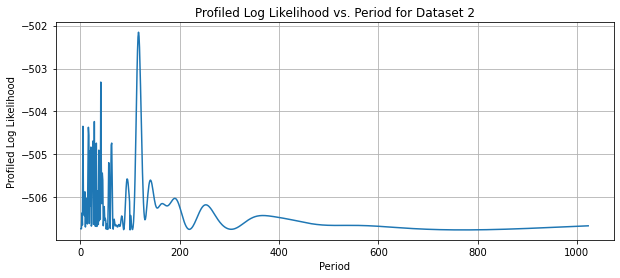

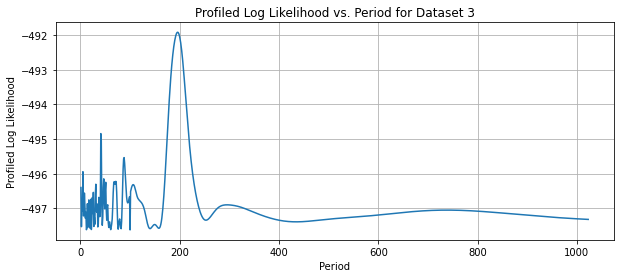

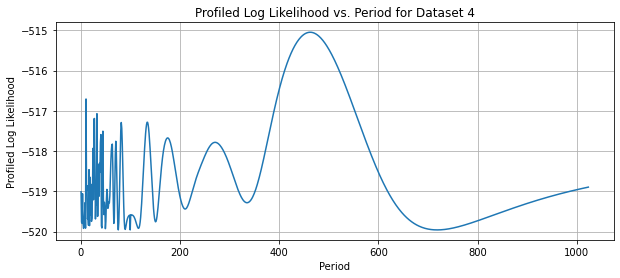

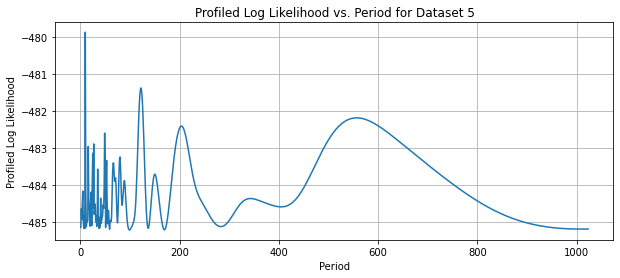

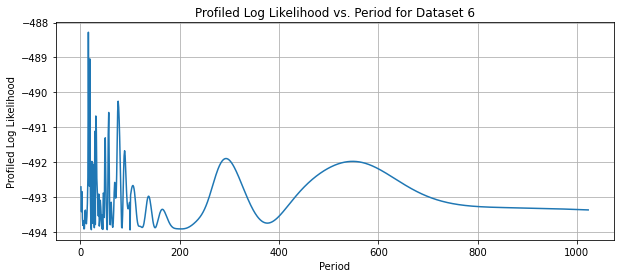

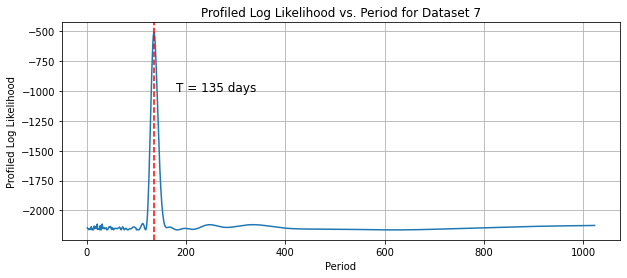

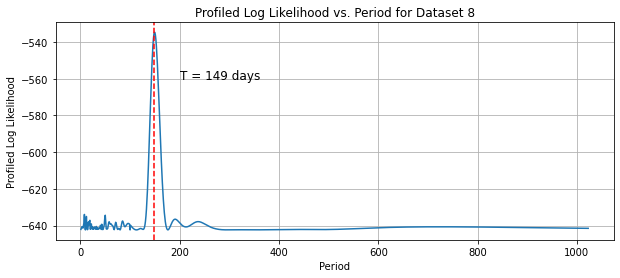

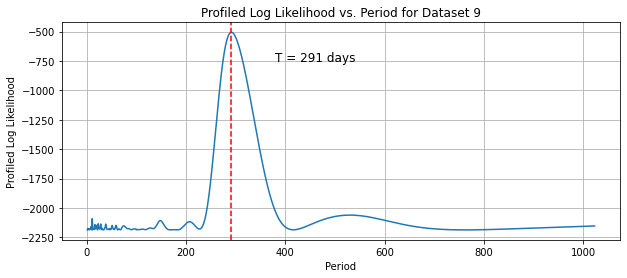

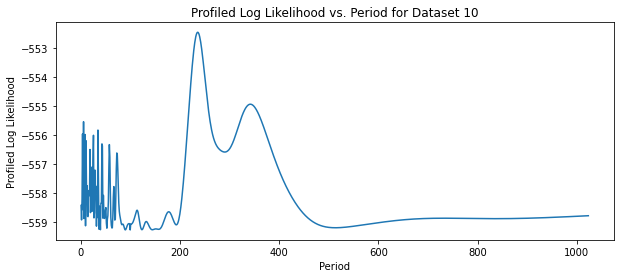

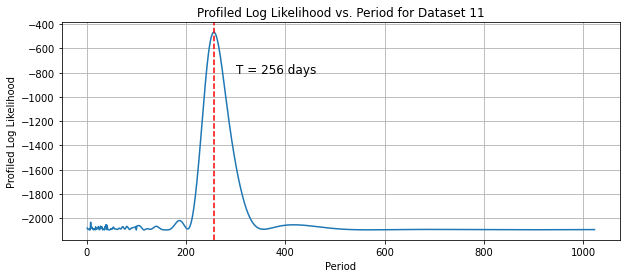

In [26]:
#DATASET 2

plt.figure(1, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds2)
plt.title('Profiled Log Likelihood vs. Period for Dataset 2')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.grid()
plt.show()

#DATASET 3
plt.figure(2, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds3)
plt.title('Profiled Log Likelihood vs. Period for Dataset 3')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.grid()
plt.show()

#DATASET 4
plt.figure(3, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds4)
plt.title('Profiled Log Likelihood vs. Period for Dataset 4')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.grid()
plt.show()

#DATASET 5
plt.figure(4, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds5)
plt.title('Profiled Log Likelihood vs. Period for Dataset 5')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.grid()
plt.show()

#DATASET 6
plt.figure(5, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds6)
plt.title('Profiled Log Likelihood vs. Period for Dataset 6')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.grid()
plt.show()

#DATASET 7
plt.figure(6, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds7)
plt.title('Profiled Log Likelihood vs. Period for Dataset 7')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.axvline(135,0, color = 'r', ls = '--')
plt.text(180, -1000, 'T = 135 days', fontsize = 12)
plt.grid()
plt.show()

#DATASET 8
plt.figure(7, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds8)
plt.title('Profiled Log Likelihood vs. Period for Dataset 8')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.axvline(149,0, color = 'r', ls = '--')
plt.text(200, -560, 'T = 149 days', fontsize = 12)
plt.grid()
plt.show()

#DATASET 9
plt.figure(8, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds9)
plt.title('Profiled Log Likelihood vs. Period for Dataset 9')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.axvline(291,0, color = 'r', ls = '--')
plt.text(380, -750, 'T = 291 days', fontsize = 12)
plt.grid()
plt.show()

#DATASET 10
plt.figure(9, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds10)
plt.title('Profiled Log Likelihood vs. Period for Dataset 10')
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.show()

#DATASET 11
plt.figure(10, figsize = (10,4))

plt.plot(np.arange(T_start, T_end, 1), results_ds11)
plt.title('Profiled Log Likelihood vs. Period for Dataset 11' )
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.axvline(256,0, color = 'r', ls = '--')
plt.text(300, -800, 'T = 256 days', fontsize = 12)
plt.grid()
plt.show()

After seeing the profiled log likelihood vs. period plots for each dataset, we can conclude that Datasets 7, 8, 9, and 11 have another statistically significant sinusoidal signal occuring at a period of 135, 149, 291, and 256 days respectively.

In [27]:
#Let's find out what period the secondary signal occurs:

max_likelihood7 = np.max(results_ds7)
indx_7 = np.where(results_ds7 == max_likelihood7)
print(timestep[indx_7])

max_likelihood8 = np.max(results_ds8)
indx_8 = np.where(results_ds8 == max_likelihood8)
print(timestep[indx_8])

max_likelihood9 = np.max(results_ds9)
indx_9 = np.where(results_ds9 == max_likelihood9)
print(timestep[indx_9])

max_likelihood11 = np.max(results_ds11)
indx_11 = np.where(results_ds11 == max_likelihood11)
print(timestep[indx_11])

[135]
[149]
[291]
[256]


***Problem 3: Go back and re-measure the 100-day-period signals, marginalizing out the second signal, in the cases in which the second signal has a significant amplitude.***

In [28]:
# optimize nuisance parameter (period in this case)
# solving thru brute force

def pro_likelihood(T, time, y, sigma_y):
    T_0 = 100 #days 
    Y = np.reshape(y,(len(y),1))
    A = np.column_stack([np.ones(len(time)), 
                         np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0), 
                         np.cos(2 * np.pi * time/T), 
                         np.sin(2 * np.pi * time/T)])

    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)

    # this should give us the best A_1, A_2, A_3, A_4, and B values at the given T
    pars = np.linalg.lstsq(A.T@C_inv@A, A.T@C_inv@Y, rcond = None)[0]

    # now plug in pars to our likelihood function
    # next step is to optimize this and plot against period to find the secondary period

    # equation 7 in data analysis recipes: fiting a model to data
    L = -1/2 * (A@pars - Y).T@C_inv@(A@pars - Y)
    print(L)
    
    return L[0][0]


In [29]:
T_7, T_8, T_9, T_11 = 135, 149, 291, 256

ds_7_remeasure = pro_likelihood(T_7, time, data[8], sigma_y)
ds_8_remeasure = pro_likelihood(T_8, time, data[9], sigma_y)
ds_9_remeasure = pro_likelihood(T_9, time, data[10], sigma_y)
ds_11_remeasure = pro_likelihood(T_11, time, data[12], sigma_y)

[[-506.38319303]]
[[-534.64622645]]
[[-506.24531731]]
[[-466.67587666]]


In [30]:
def MLE_new(time, y, sigma_y, T_0, T):
    Y = np.reshape(y,(len(y),1))
    A = np.column_stack([np.ones(len(time)), 
                         np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0), 
                         np.cos(2 * np.pi * time/T), 
                         np.sin(2 * np.pi * time/T)])
    
    # this should give us the best A_1, A_2, A_3, A_4, and B values at the given T
    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)
        
    X = np.linalg.lstsq(A.T@C_inv@A, A.T@C_inv@Y, rcond = None)[0]
    variance = np.sqrt(np.linalg.inv(A.T@C_inv@A))
    tot_amp = np.sqrt(X[0][0]**2 + X[1][0]**2)

    print('The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are:', X[0][0], ',', X[1][0], ',', X[2][0], ',', X[3][0], '&', X[4][0])

    return X

In [31]:
period = 100 #days 

MLE_new(time, data[8], sigma_y, period, T_7)
MLE_new(time, data[9], sigma_y, period, T_8)
MLE_new(time, data[10], sigma_y, period, T_9)
MLE_new(time, data[12], sigma_y, period, T_11)
    

The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.4397324205255963 , 0.012893793000553044 , 0.04203435063742037 , 0.07797701822415892 & 0.8154638280066658


<ipython-input-30-1882f0440d5f>:14: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(A.T@C_inv@A))


The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.48260460701707386 , 0.04025953183158559 , -0.08944995375194326 , 0.0605425910296946 & -0.19704624134218662
The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.38694040990671197 , 0.17874662364762361 , -0.2665441330633056 , 0.4384762265158314 & -0.6882271546828319
The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.0692509774622088 , 1.9661314980997608 , 2.2864804105524783 , 0.5317440171212392 & 0.6379138374843989


array([[0.06925098],
       [1.9661315 ],
       [2.28648041],
       [0.53174402],
       [0.63791384]])

The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.4397324205255963 , 0.012893793000553044 , 0.04203435063742037 , 0.07797701822415892 & 0.8154638280066658


<ipython-input-30-1882f0440d5f>:14: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(A.T@C_inv@A))


The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.48260460701707386 , 0.04025953183158559 , -0.08944995375194326 , 0.0605425910296946 & -0.19704624134218662
The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.38694040990671197 , 0.17874662364762361 , -0.2665441330633056 , 0.4384762265158314 & -0.6882271546828319
The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.0692509774622088 , 1.9661314980997608 , 2.2864804105524783 , 0.5317440171212392 & 0.6379138374843989


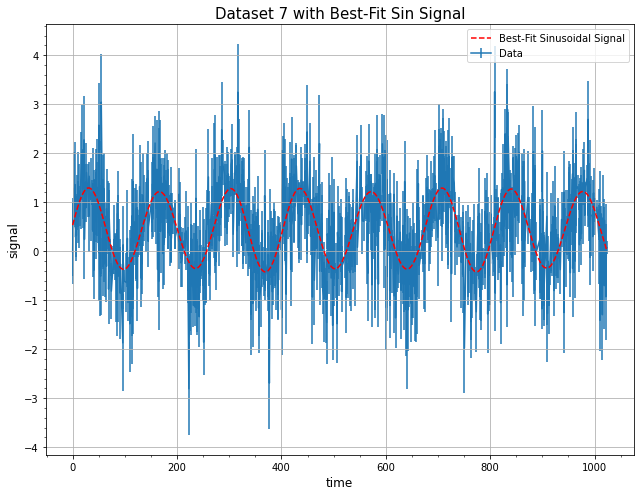

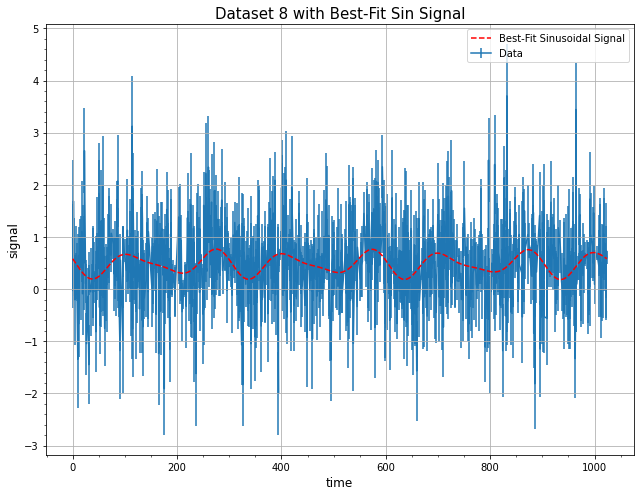

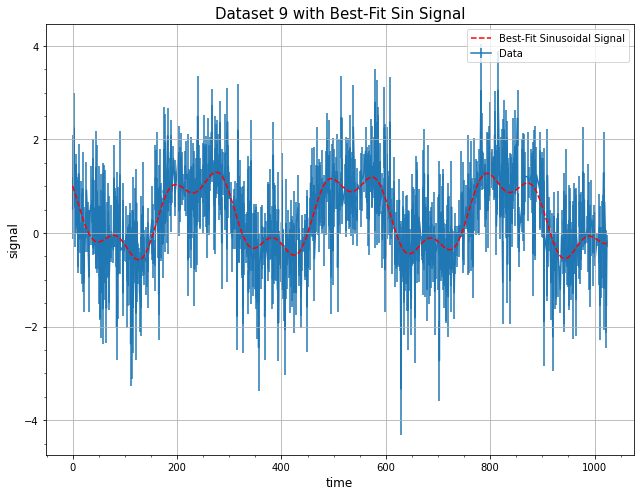

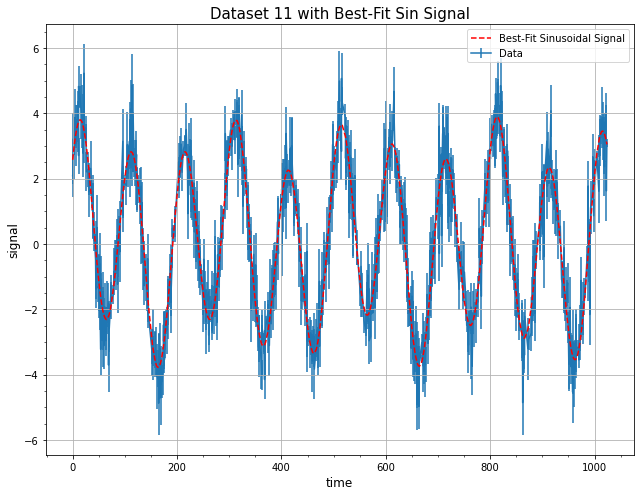

In [32]:
# let's see how our remeasurements affect our best-fit sin signals!
results_7 = MLE_new(time, data[8], sigma_y, period, T_7)
results_8 = MLE_new(time, data[9], sigma_y, period, T_8)
results_9 = MLE_new(time, data[10], sigma_y, period, T_9)
results_11 = MLE_new(time, data[12], sigma_y, period, T_11)

#defining a function to fit the best fit sin signal
def sin_signal_new(B, A_1, A_2, A_3, A_4, time, T_0, T):
    return B + A_1*np.cos(2 * np.pi * time/T_0) + A_2*np.sin(2 * np.pi * time/T_0) + A_3*np.cos(2 * np.pi * time/T) + A_4*np.sin(2 * np.pi * time/T)

# Let's visualize the data!

#DATASET 7
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal_new(results_7[0], results_7[1], results_7[2], results_7[3], results_7[4], time, period, T_7)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal', zorder = 2)
plt.errorbar(time, data[8], yerr = sigma_y, markersize = 10, label = 'Data',  zorder = 1)

plt.title('Dataset 7 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

#DATASET 8
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal_new(results_8[0], results_8[1], results_8[2], results_8[3], results_8[4], time, period, T_8)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal',  zorder = 2)
plt.errorbar(time, data[9], yerr = sigma_y, markersize = 10, label = 'Data',  zorder = 1)

plt.title('Dataset 8 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

# DATASET 9
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal_new(results_9[0], results_9[1], results_9[2], results_9[3], results_9[4], time, period, T_9)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal',  zorder = 2)
plt.errorbar(time, data[10], yerr = sigma_y, markersize = 10, label = 'Data',  zorder = 1)

plt.title('Dataset 9 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

#DATASET 11
plt.figure(figsize=(9,7))
bestfit_sin = sin_signal_new(results_11[0], results_11[1], results_11[2], results_11[3], results_11[4], time, period, T_11)
plt.plot(time, bestfit_sin, '--r', label = 'Best-Fit Sinusoidal Signal', zorder = 2)
plt.errorbar(time, data[12], yerr = sigma_y, markersize = 10, label = 'Data', zorder = 1)

plt.title('Dataset 11 with Best-Fit Sin Signal', size = 15)
plt.xlabel('time', size = 12)
plt.ylabel('signal', size = 12)

plt.legend()
plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.show()

## Discussion:

Earlier in Problem 1, we overlaid our best fit sin signal (with just $A_1$, $A_2$, and $B$) specifically for Datasets 7, 8 ,9, and 11 so we can compare to our best-fit signals incorporating $A_3$ and $A_4$ (which we got by adding our secondary signal found by our profiled likelihoods). As a result we do see a much better fit when we take into consideration that there was a hidden secondary signal! 